In [ ]:
#CNN
import tensorflow as tf


In [ ]:
mnist = tf.keras.datasets.mnist
#Modified National Institute of standards and technology database
#it has a collection of greyscall images with handwritten digits
#from 0 to 9


In [ ]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
#x_train,x_test=x_train/255.0,x_255.0
#.1) why to divide by 25
#when we are working with image data,the pixel values are integers in the
#range of[0,1]
#working with the smaller values increases the stability of optimization
#alorithm

In [ ]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2601 - accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1132 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0780 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0444 - accuracy: 0.9860


In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9760


In [ ]:
print(test_loss)
print(test_accuracy)

0.07571402937173843
0.9760000109672546


In [ ]:
#Activation function
#Relu
#It is one of the most widly used activation function, It replaces all negative
#values with zero,leaving the postivevalue unchanged
#Sigmoid reduces the output between 0 and 1.making it suitable for
#binary classification problems

#tanh(Hyperbolic Tangent):
#it reduces the output between -1 to 1

#softmax
#it is mostly used in ouput layer

#Leaku Relu
#It ia a another varient of relu that allows a small positive gradient for
#negative value just to avoid dead neurons

In [ ]:
#Project:1
#Convert image to greyscall using CNN

import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the RGB image
image_path= "/content/download (3).jpeg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[0.33333334 0.5176471  0.68235296]
  [0.33333334 0.5176471  0.68235296]
  [0.33333334 0.5176471  0.68235296]
  ...
  [0.34117648 0.54509807 0.6901961 ]
  [0.34117648 0.54509807 0.6901961 ]
  [0.34117648 0.54509807 0.6901961 ]]

 [[0.3372549  0.52156866 0.6862745 ]
  [0.3372549  0.52156866 0.6862745 ]
  [0.3372549  0.52156866 0.6862745 ]
  ...
  [0.34117648 0.54509807 0.6901961 ]
  [0.34117648 0.54509807 0.6901961 ]
  [0.34117648 0.54509807 0.6901961 ]]

 [[0.34117648 0.5254902  0.6901961 ]
  [0.34117648 0.5254902  0.6901961 ]
  [0.34117648 0.5254902  0.6901961 ]
  ...
  [0.35686275 0.5529412  0.69803923]
  [0.35686275 0.5529412  0.69803923]
  [0.35686275 0.5529412  0.69803923]]

 ...

 [[0.7254902  0.78039217 0.78431374]
  [0.72156864 0.78039217 0.7921569 ]
  [0.70980394 0.78039217 0.79607844]
  ...
  [0.8784314  0.88235295 0.8509804 ]
  [0.8862745  0.8862745  0.84705883]
  [0.88235295 0.88235295 0.84313726]]

 [[0.7176471  0.78039217 0.78039217]
  [0.70980394 0.78039217 0.7882353 ]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

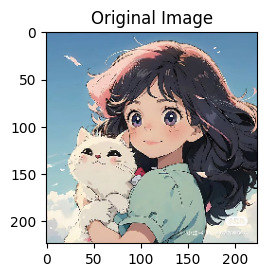

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

In [ ]:
#convert image to grey scale
model=models.Sequential()

#Sequentials()  -->   It allows us to create a linear stack of layers in a neural networks.
#you can add one layer or nueral networks at a time and each layer has connection onlymto the previous and next layer.

model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))
#Con2d --> It replreset 2D conventional Layer
#Conventional Layer -->used to perform element wise multiplication or addition ordivision etc..

#layers.Con2D(1) --> 1 is used to mention the number of filters in the conventional layer
#(3,3) --> sets the size of the filter
#(224,224,3) -->224x224 -->pixels with 3 color channel(RGB)

model.add(layers.MaxPooling2D((2,2)))
#MaxPooling2D() -->It is used to set the dimentions of input data
#and extact important features from Conv2D

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 1)       0         
 D)                                                              
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

1/1 [==============================] - 0s 82ms/step


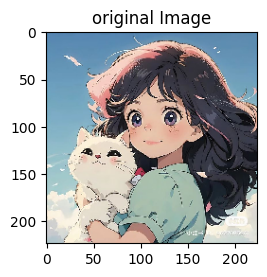

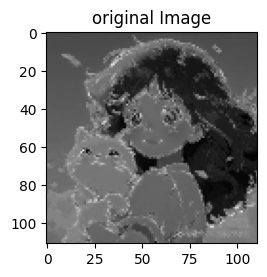

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("original Image")
plt.imshow(original_array)

plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.title("original Image")
plt.imshow(np.squeeze(greyscale),cmap='red')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Project-2
# Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [28]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISEY_DIR = "/content/drive/MyDrive/archive (4)-20240219T091517Z-001/archive (4)/train/daisy"
FLOWER_SUNFLOWER_DIR ="/content/drive/MyDrive/archive (4)-20240219T091517Z-001/archive (4)/train/sunflower"
FLOWER_TULIP_DIR = "/content/drive/MyDrive/archive (4)-20240219T091517Z-001/archive (4)/train/tulip"
FLOWER_DANDI_DIR ="/content/drive/MyDrive/archive (4)-20240219T091517Z-001/archive (4)/train/dandelion"
FLOWER_ROSE_DIR ="/content/drive/MyDrive/archive (4)-20240219T091517Z-001/archive (4)/train/rose"

In [29]:
def assign_label(img, flower_type):
	return flower_type

In [30]:
# tqdm --> It creates a progress bar from the loop
def make_train_data(flower_type, DIR):
	for img in tqdm(os.listdir(DIR)):
		label = assign_label(img, flower_type)
		path = os.path.join(DIR, img)
		img = cv2.imread(path, cv2.IMREAD_COLOR)
		img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

		X.append(np.array(img))
		Z.append(str(label))

In [31]:
make_train_data('Daisy', FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 501/501 [00:12<00:00, 39.31it/s]

501


In [32]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:19<00:00, 26.03it/s] 

996


In [33]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 559/559 [00:14<00:00, 37.47it/s] 

1555


In [34]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 646/646 [00:16<00:00, 38.70it/s]

2201


In [35]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:11<00:00, 44.68it/s]

2698


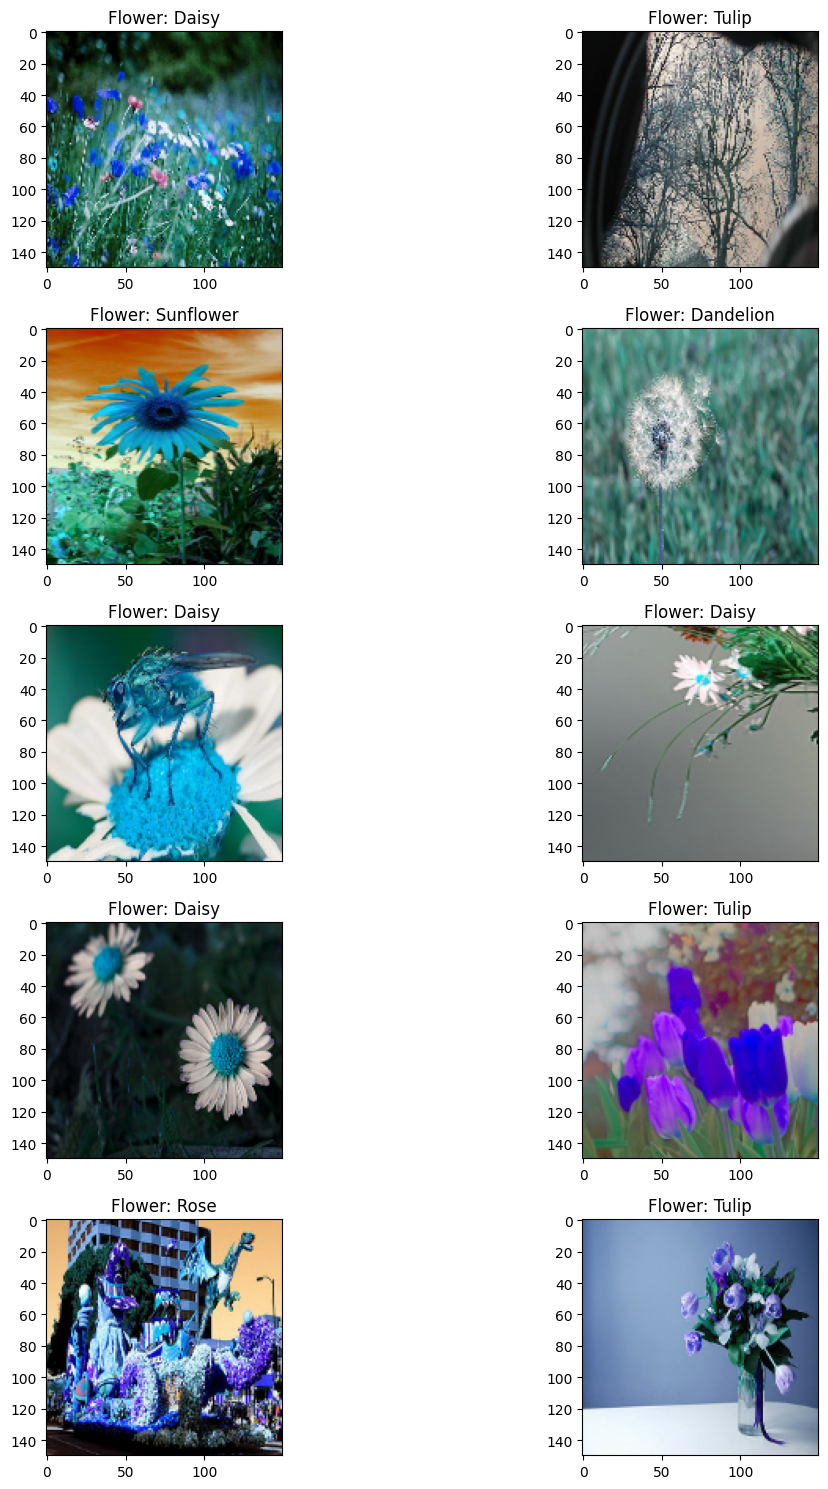

In [37]:
fig, ax = plt.subplots(5,2)
fig.set_size_inches(15,15)

for row in range(5):
	for col in range(2):
		l=rn.randint(0, len(Z))
		ax[row,col].imshow(X[l])
		ax[row,col].set_title("Flower: "+Z[l])
	plt.tight_layout()